In [34]:
import sys
sys.path.insert(0, '../scripts/')
import pm4py

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

from utils import print_stats

# import xes log
log = xes_importer.apply("../data/logs/transaction_methods/one_year_land_proxy_txs.xes")

print_stats(log)

parsing log, completed traces :: 100%|██████████| 4895/4895 [00:01<00:00, 3222.52it/s]


Traces: 4895
Events: 12299


##### Inductive Miner

Three variants: [inductive miner (IM)](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.396.197&rep=rep1&type=pdf), the [inductive miner infrequent (IMf)](http://www.padsweb.rwth-aachen.de/wvdaalst/publications/p761.pdf), the inductive miner directly-follows (IMd) algorithm. 

The basic idea of Inductive Miner is about detecting a 'cut' in the log (e.g. sequential cut, parallel cut, concurrent cut and loop cut) and then recur on sublogs, which were found applying the cut, until a base case is found. The Directly-Follows variant avoids the recursion on the sublogs but uses the Directly Follows graph.

Inductive miner models usually make extensive use of hidden transitions, especially for skipping/looping on a portion on the model. Furthermore, each visible transition has a unique label (there are no transitions in the model that share the same label).

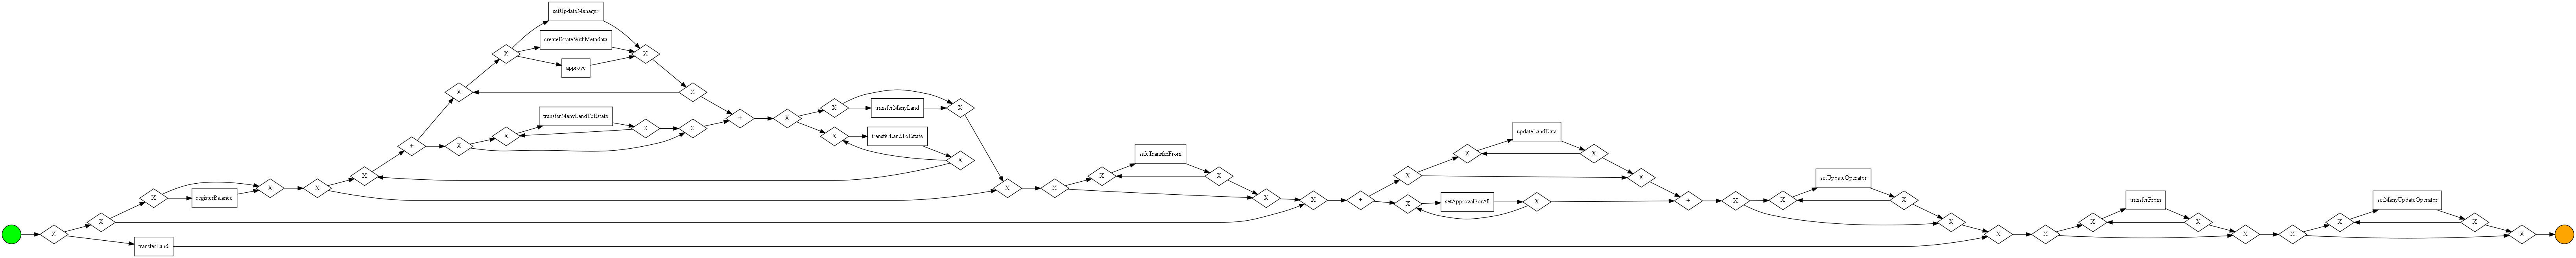

In [13]:
# process tree - variants can be IM, IMf (NOISE_THRESHOLD param can be setted), IMd
tree = inductive_miner.apply_tree(
    log, variant=inductive_miner.Variants.IMf)

inductive_bpmn = pt_converter.apply(tree, variant=pt_converter.Variants.TO_BPMN)

inductive_gviz = bpmn_visualizer.apply(inductive_bpmn)
bpmn_visualizer.view(inductive_gviz)

pm4py.write_bpmn(inductive_bpmn, "../data/models/transaction_methods/one_year/one_year_land_proxy_IMf.bpmn")

##### Heuristic Miner 

[Heuristics Miner](https://www.semanticscholar.org/paper/Process-mining-with-the-HeuristicsMiner-algorithm-Weijters-Aalst/e61c748f9a2df9c3fbda3a8361fdc3d847b7e3ae?p2df) is an algorithm that acts on the Directly-Follows Graph, providing way to handle with noise and to find common constructs (dependency between two activities, AND). The output of the Heuristics Miner is an Heuristics Net, so an object that contains the activities and the relationships between them. 

Parameters:
- dependency_threshold: dependency threshold of the Heuristics Miner (default: 0.5)
- and_threshold: AND measure threshold of the Heuristics Miner (default: 0.65)
- loop_two_threshold thresholds for the loops of length 2 (default 0.5)

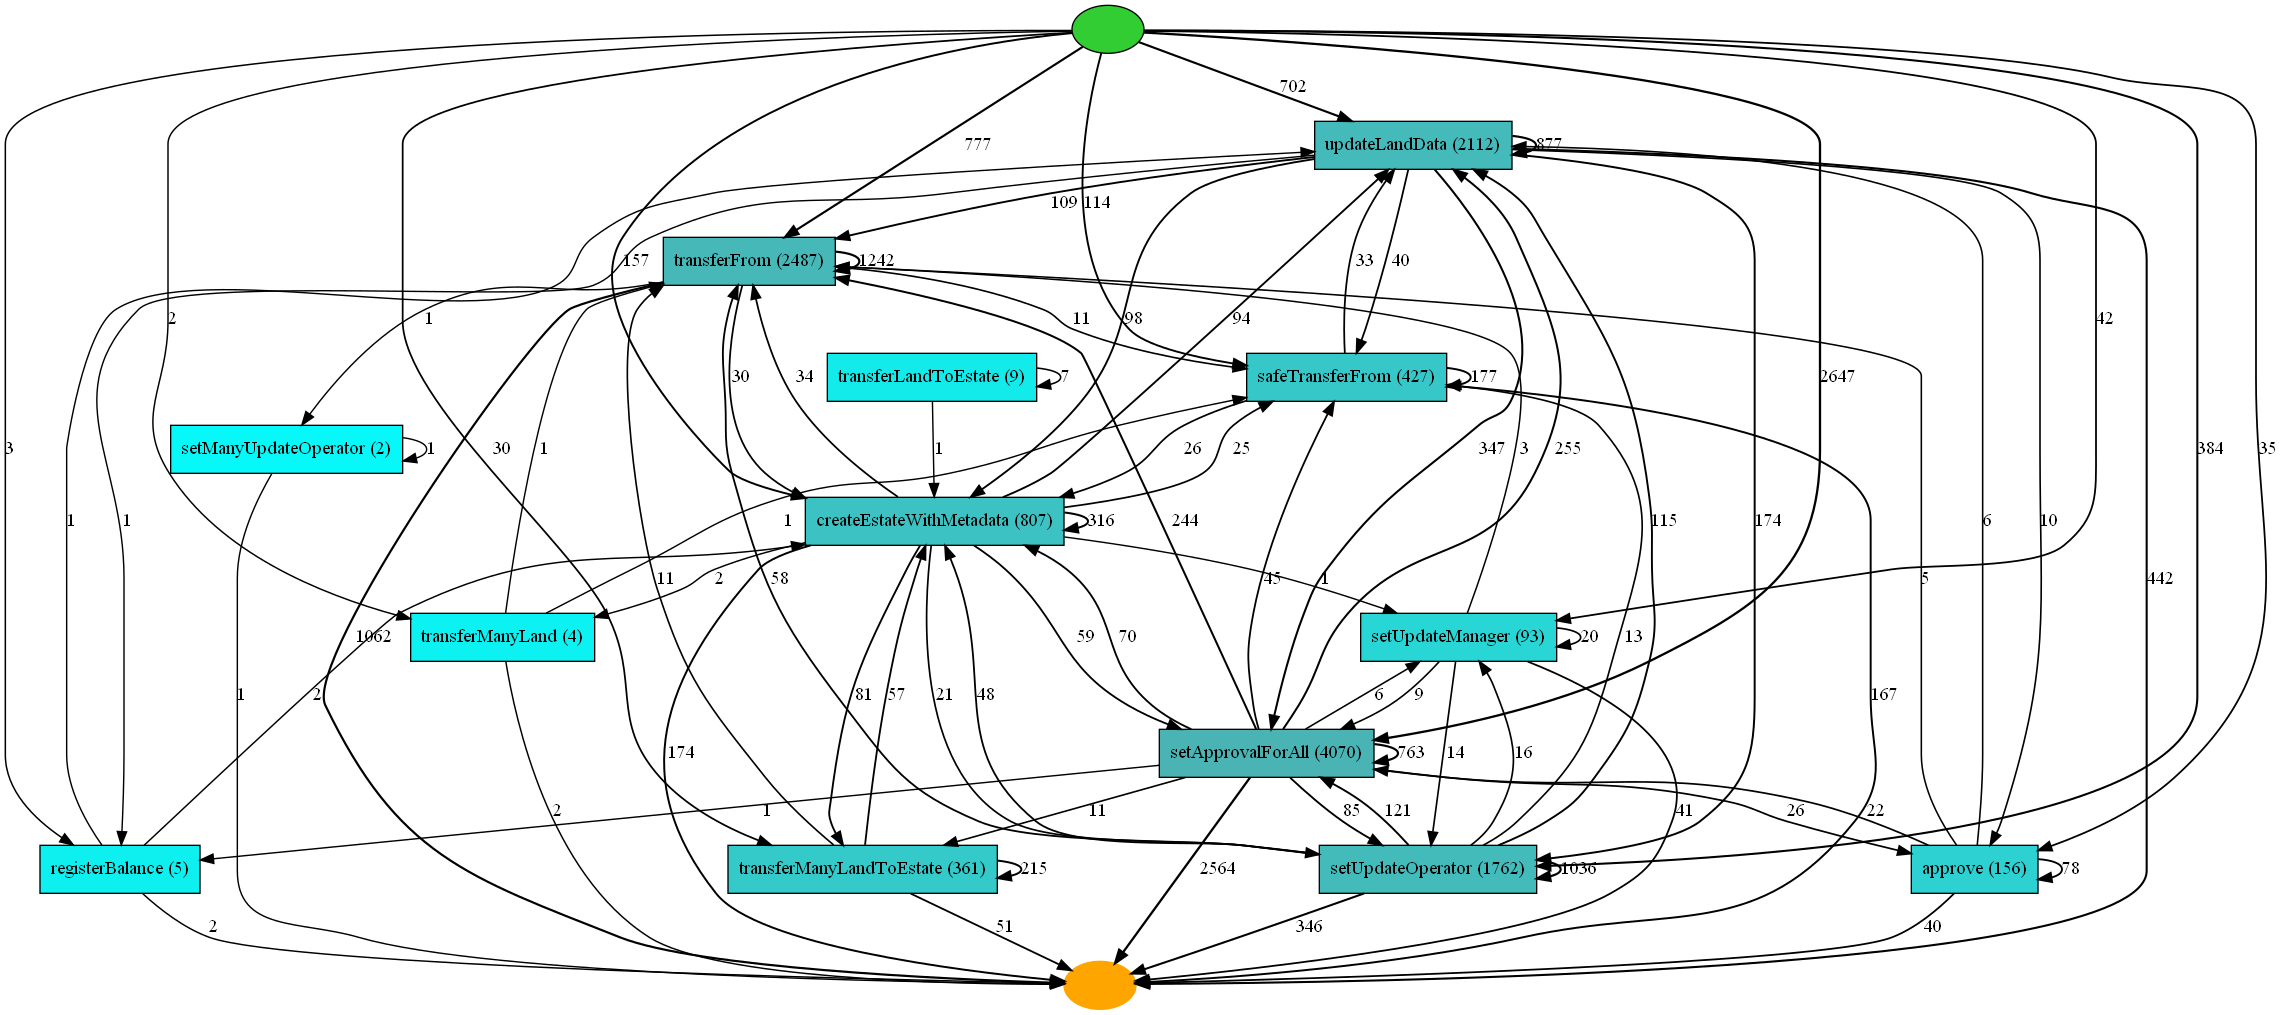

In [35]:
heu_net = pm4py.discover_heuristics_net(log)

pm4py.view_heuristics_net(heu_net)

net, im, fm = pm4py.discover_petri_net_heuristics(log)

pm4py.write_pnml(net, im, fm, "../data/models/transaction_methods/one_year/one_year_proxy_heuristic_default.pnml")



##### Alpha Miner

The alpha miner is one of the most known Process Discovery algorithm and is able to find:
- A Petri net model where all the transitions are visible and unique and correspond to classified events (for example, to activities).
- An initial marking that describes the status of the Petri net model when a execution starts.
- A final marking that describes the status of the Petri net model when a execution ends.

In [36]:
net, im, fm = pm4py.discover_petri_net_alpha(log)

pm4py.write_pnml(net, im, fm, "../data/models/transaction_methods/one_year/one_year_land_proxy_alpha_pnml")